In [2]:
import os
from collections import defaultdict

import numpy as np
import scipy as sp
from scipy import misc, stats
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
from fitter import Fitter

%matplotlib inline

In [3]:
DIRNAME = '../data/images/'
COLOR = {'red': 0,
         'green': 1,
         'blue': 2}  # RGB

In [4]:
with open('../data/Dataset_test.txt') as f:
    image_names = ['im'+ x.strip()+'.jpg' for x in f.readlines()]

## 2. Для каждого канала цвета каждого изображения из тестового пакета вычислить следующие характеристики:

In [5]:
image_names =  image_names[:1000]

In [6]:
len(image_names)

1000

In [7]:
data = {}
for name, num in COLOR.items():
    data[name] = pd.DataFrame()
    for image_name in image_names:
        image = np.array(Image.open(DIRNAME+image_name))
        a = image[:, :, num].ravel()
        d = {'name': image_name,
             'min': np.min(a),
             'max': np.max(a),
             'mean': np.mean(a),
             'var': np.var(a),
             'median': np.median(a),
             'interquartile': sp.stats.iqr(a),
             'skewness': sp.stats.skew(a),
             'kurtosis': sp.stats.kurtosis(a)}
        data[name] = pd.concat([data[name], pd.DataFrame(pd.DataFrame(d, index=[0,]))], ignore_index=True)

In [8]:
data['blue'].head()

,interquartile,kurtosis,max,mean,median,min,name,skewness,var
0,144.0,-1.218581,255,128.568980,119.0,0,im16576.jpg,0.081357,6721.048042
1,39.0,1.883464,245,27.329422,14.0,0,im5894.jpg,1.529257,1077.552878
2,185.0,-1.420792,255,140.306769,175.0,0,im19832.jpg,-0.420715,8150.326908
3,69.0,0.420831,255,48.793016,44.0,0,im20180.jpg,0.695097,1640.521062
4,70.0,-0.512638,255,133.771309,136.0,0,im9697.jpg,0.204475,3891.966529


In [10]:
data['blue']['var'] ** 0.5

0       81.981998
1       32.826101
2       90.279161
3       40.503346
4       62.385628
5       36.614761
6       76.479247
7       50.136669
8       64.182796
9       36.193831
10      79.858329
11      64.204199
12      32.665673
13      45.786030
14      45.871820
15      10.948767
16      80.619433
17      50.680645
18      56.955027
19      58.135702
20      66.654836
21      60.394431
22      47.647702
23     103.847621
24      55.164168
25      28.608532
26      53.497317
27      89.253981
28      75.455532
29      38.010443
          ...    
970     58.188496
971     57.425242
972     21.404943
973     98.565068
974     42.420727
975     52.024000
976     81.491209
977     49.569003
978     66.122950
979     68.981624
980     73.707762
981     47.872716
982     79.928235
983     54.593599
984     94.404777
985     72.697941
986     63.894325
987     30.467115
988     41.369822
989     38.715285
990     70.946358
991     34.169092
992     53.018024
993     98.019101
994     60

In [10]:
data['red'].head()

,interquartile,kurtosis,max,mean,median,min,name,skewness,var
0,125.0,-0.847614,255,196.728732,240.0,0,im16576.jpg,-0.868821,4917.605898
1,56.0,1.859215,253,34.201921,12.0,0,im5894.jpg,1.537566,1954.242937
2,96.0,-0.379945,255,168.092745,193.0,0,im19832.jpg,-0.848495,4899.877212
3,74.0,-0.488112,255,141.325076,153.0,0,im20180.jpg,-0.577813,2424.941474
4,67.0,-0.490239,255,147.468781,156.0,0,im9697.jpg,-0.285246,3780.839680


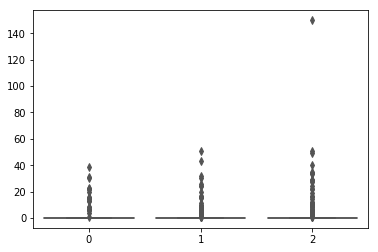

In [11]:
sns.boxplot(data=[data['blue']['min'], data['green']['min'], data['red']['min'],], palette="muted")

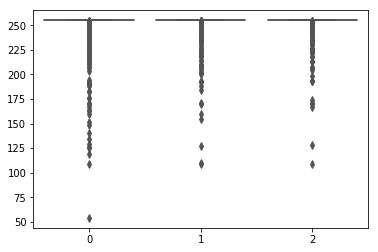

In [12]:
sns.boxplot(data=[data['blue']['max'], data['green']['max'], data['red']['max'],], palette="muted")

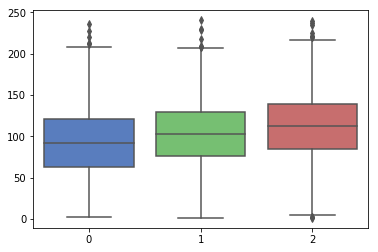

In [13]:
sns.boxplot(data=[data['blue']['mean'], data['green']['mean'], data['red']['mean'],], palette="muted")

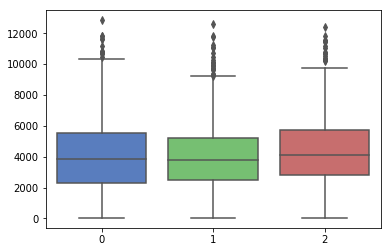

In [14]:
sns.boxplot(data=[data['blue']['var'], data['green']['var'], data['red']['var'],], palette="muted")

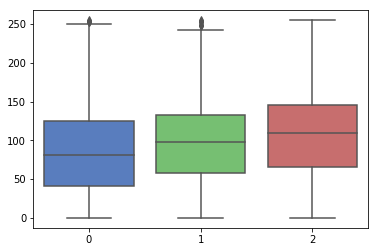

In [15]:
sns.boxplot(data=[data['blue']['median'], data['green']['median'], data['red']['median'],], palette="muted")

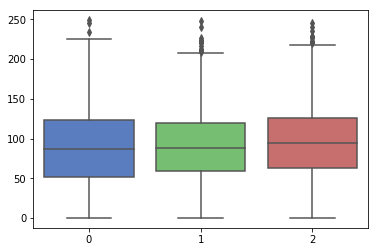

In [16]:
sns.boxplot(data=[data['blue']['interquartile'], data['green']['interquartile'], data['red']['interquartile'],], palette="muted")

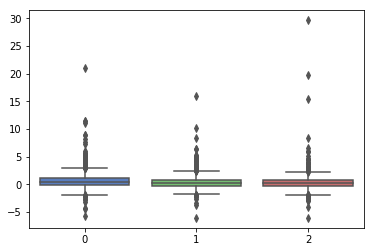

In [17]:
sns.boxplot(data=[data['blue']['skewness'], data['green']['skewness'], data['red']['skewness'],], palette="muted")

In [11]:
np.mean(data['blue']['skewness'])

0.70174452681063892

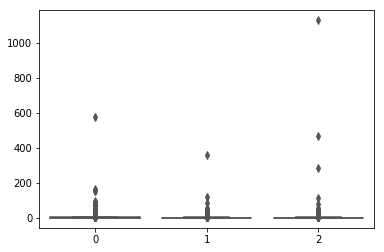

In [18]:
sns.boxplot(data=[data['blue']['kurtosis'], data['green']['kurtosis'], data['red']['kurtosis'],], palette="muted")

## аппроксимация

In [6]:
DISTRIBUTIONS = ['beta', 'gamma', 'uniform', 'norm']
BINS = 256

In [7]:
hist = {'red': defaultdict(int),
        'green': defaultdict(int),
        'blue': defaultdict(int),}

In [8]:
for name, num in COLOR.items():
    for image_name in image_names[:10]:
        image = np.array(Image.open(os.path.join(DIRNAME, image_name)))
        a = image[:, :, num].ravel()
        f = Fitter(a, distributions=DISTRIBUTIONS, bins=BINS)
        f.fit()
        hist[name][f.df_errors['sumsquare_error'].idxmin()] += 1

Fitted beta distribution with error=0.005310749128279641)
Fitted gamma distribution with error=0.006679281312978156)
Fitted uniform distribution with error=0.005901418705130642)
Fitted norm distribution with error=0.006697619430300174)


/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning:

invalid value encountered in sqrt



Fitted beta distribution with error=0.04165261839350206)
Fitted gamma distribution with error=0.01462017591072862)
Fitted uniform distribution with error=0.06034765447146044)
Fitted norm distribution with error=0.05368593575817818)
Fitted beta distribution with error=0.0047621906104498065)
Fitted gamma distribution with error=0.005284305217468161)
Fitted uniform distribution with error=0.004098220318962382)
Fitted norm distribution with error=0.005239809986407704)
Fitted beta distribution with error=0.004645358382506405)
Fitted gamma distribution with error=0.004228019377186552)
Fitted uniform distribution with error=0.012779733883702836)
Fitted norm distribution with error=0.00979716962150628)
Fitted beta distribution with error=0.0025049527328338582)
Fitted gamma distribution with error=0.0021197248628710146)
Fitted uniform distribution with error=0.0027030663034240173)
Fitted norm distribution with error=0.0021197599783153963)
Fitted beta distribution with error=0.011977766923013307

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



Fitted beta distribution with error=0.01036468667046416)
Fitted gamma distribution with error=0.011514263113334764)
Fitted uniform distribution with error=0.057256317133505374)
Fitted norm distribution with error=0.05136007546147002)
Fitted beta distribution with error=0.004111826894697017)
Fitted gamma distribution with error=0.0023685620289553636)
Fitted uniform distribution with error=0.004596437206112333)
Fitted norm distribution with error=0.005533348974477421)
Fitted beta distribution with error=0.001454707575635456)
Fitted gamma distribution with error=0.0015225777071800376)
Fitted uniform distribution with error=0.0025908733497886378)
Fitted norm distribution with error=0.0017649051777559664)
Fitted beta distribution with error=0.003779214309068424)
Fitted gamma distribution with error=0.0034680292936583525)
Fitted uniform distribution with error=0.0069626243180747035)
Fitted norm distribution with error=0.0069643856897796015)
Fitted beta distribution with error=0.0312660238736

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



Fitted beta distribution with error=0.001635883116632848)
Fitted gamma distribution with error=0.0016458910051922705)
Fitted uniform distribution with error=0.004035258154960419)
Fitted norm distribution with error=0.0016410103466306116)
Fitted beta distribution with error=0.004547650045442292)
Fitted gamma distribution with error=0.004726345346663991)
Fitted uniform distribution with error=0.01262627889464425)
Fitted norm distribution with error=0.012027376722752182)
Fitted beta distribution with error=0.029587778387867313)
Fitted gamma distribution with error=0.025909139491421013)
Fitted uniform distribution with error=0.034265670414995154)
Fitted norm distribution with error=0.031011342205707285)


In [11]:
hist

{'blue': defaultdict(int, {'beta': 3, 'gamma': 6, 'uniform': 1}),
 'green': defaultdict(int, {'beta': 4, 'gamma': 6}),
 'red': defaultdict(int, {'beta': 5, 'gamma': 4, 'norm': 1})}

,sumsquare_error
gamma,0.025909
beta,0.029588
norm,0.031011
uniform,0.034266


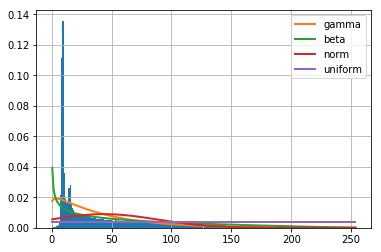

In [10]:
f.summary()

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning:

invalid value encountered in sqrt

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



Fitted beta distribution with error=0.01036468667046416)
Fitted gamma distribution with error=0.011514263113334764)
Fitted uniform distribution with error=0.057256317133505374)
Fitted norm distribution with error=0.05136007546147002)


,sumsquare_error
beta,0.010365
gamma,0.011514
norm,0.051360
uniform,0.057256


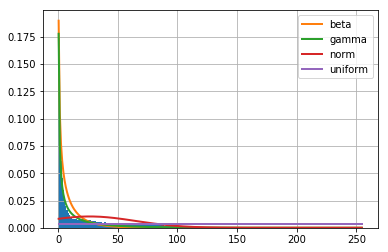

In [12]:
num = 0

image = np.array(Image.open(os.path.join(DIRNAME, image_names[5])))
a =image[:, :, num].ravel()
f = Fitter(a, distributions=DISTRIBUTIONS, bins=BINS)
f.fit()
f.summary()

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning:

invalid value encountered in sqrt

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



Fitted beta distribution with error=0.012208063385963067)
Fitted gamma distribution with error=0.011510054876663262)
Fitted uniform distribution with error=0.022647967258536225)
Fitted norm distribution with error=0.01802454211955878)


,sumsquare_error
gamma,0.011510
beta,0.012208
norm,0.018025
uniform,0.022648


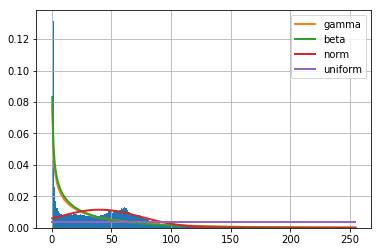

In [13]:
num = 1

image = np.array(Image.open(os.path.join(DIRNAME, image_names[5])))
a =image[:, :, num].ravel()
f = Fitter(a, distributions=DISTRIBUTIONS, bins=BINS)
f.fit()
f.summary()

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning:

invalid value encountered in sqrt



Fitted beta distribution with error=0.011977766923013307)
Fitted gamma distribution with error=0.009502312323156452)
Fitted uniform distribution with error=0.027736971290472888)
Fitted norm distribution with error=0.023821791509839294)


,sumsquare_error
gamma,0.009502
beta,0.011978
norm,0.023822
uniform,0.027737


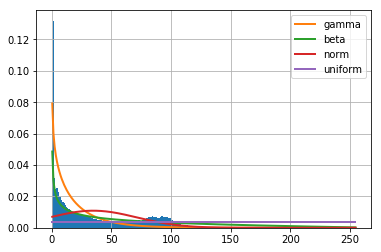

In [14]:
num = 2

image = np.array(Image.open(os.path.join(DIRNAME, image_names[5])))
a =image[:, :, num].ravel()
f = Fitter(a, distributions=DISTRIBUTIONS, bins=BINS)
f.fit()
f.summary()

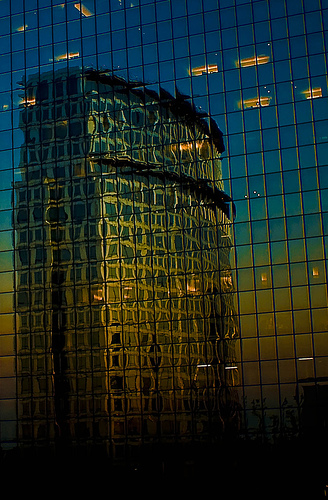

In [19]:
Image.open(os.path.join(DIRNAME, image_names[5]))

In [ ]:
f.df_errors['sumsquare_error']

In [ ]:
f.df_errors['sumsquare_error']

In [ ]:
hist

In [ ]:
N = 3
beta = (555, 541, 565)
gamma = (317, 321, 325,)
norm = (66, 73, 58)
uniform = (62, 65, 52)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence



p2 = plt.bar(ind, gamma, width, bottom=norm)
p3 = plt.bar(ind, norm, width, bottom=uniform)
p4 = plt.bar(ind, uniform, width, bottom=beta)
p1 = plt.bar(ind, beta, width)

plt.ylabel('Кількість зображень')
plt.xticks(ind, ('red', 'green', 'blue'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0],), ('beta', 'gamma', 'norm', 'uniform'))

plt.show()

In [ ]:
image.shape